<a href="https://colab.research.google.com/github/wsdabreu/Titanic_Kaggle/blob/master/Titanic_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Kaggle 

## 1. Target and description
The main objective is create a model to sorts, who people are more likely to survive in the titanic accident.

## 2. Description, initial analisys

In [4]:
import pandas as pd #Data manipulation
import numpy as np #Linear algebra
from scipy.stats import norm  
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import variation 
from scipy.stats import skew
from scipy import stats
from scipy.stats import norm, kurtosis
import seaborn as sns; sns.set(style='darkgrid')
import matplotlib.pyplot as plt

"""Display markdown formatted output like bold, italic bold etc."""
from IPython.display import Markdown
def bold(string):
    return display(Markdown(f"**{string}**"))

In [5]:
#Config dataSet from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#Importing dataSet from google drive

#Test
df_Test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DataSets/Titanic/test.csv')

#Train
df_Train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DataSets/Titanic/train.csv')


In [7]:
#Test data head
df_Test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
#Train data head
df_Test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
df_concated = pd.concat([df_Train, df_Test], sort = False).reset_index(drop=True)

In [10]:
bold("Shape of the df_concated:")
display(df_concated.shape)

bold("Name of the Variables in df_concated:")
display(df_concated.columns)

**Shape of the df_concated:**

(1309, 12)

**Name of the Variables in df_concated:**

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')




*   PassengerId is a unique identifying number assigned to each passenger.
*   Survived is a flag that indicates if a passenger survived or died ( i.e., 0 = No, 1 = Yes).
*   Pclass is the passenger class (i.e., 1 = 1st class, 2 = 2nd class, 3 = 3rd class).
*   Name is the name of the passenger.
*   Sex indicates the gender of the passenger (i.e., Male or female).
*   Age indicates the age of the passenger.
*   Sibsp is the number of siblings/spouses aboard.
*   Parch is the number of parents/children aboard.
*   Ticket indicates the ticket number issued to the passenger.
*   Fare indicates the amount of money spent on their ticket.
*   Cabin indicates the cabin category occupied by the passenger.
*   Embarked indicates the port where the passenger embarked from (i.e., C = Cherbourg, Q = Queenstown, S = Southampton).








In [11]:
bold("Data Types of Variables:")
display(df_concated.dtypes)

**Data Types of Variables:**

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

1. Nominal: Survived, Sex, Cabin, Embarked, Ticket, Name, SibSp, Parch 
2. Ordinal: Pclass. 
2. Numerical: Fare, Age, PassangerId, 

In [12]:
df_concated.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Univariate Analisys

Quantitative variables

central tendency measures

In [29]:
df_concated_ds = df_concated.drop(columns=['PassengerId', 'Survived','Age','SibSp','Parch'],axis=1)
df_concated_ds.describe()

,Pclass,Fare
count,1309.000000,1308.000000
mean,2.294882,33.295479
std,0.837836,51.758668
min,1.000000,0.000000
25%,2.000000,7.895800
50%,3.000000,14.454200
75%,3.000000,31.275000
max,3.000000,512.329200


2.2 Age

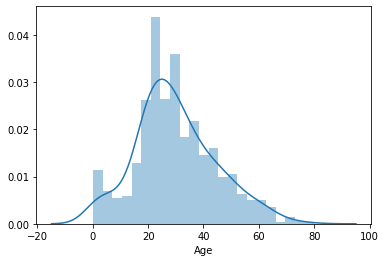

In [14]:
sns.distplot(df_concated_ds.Age, kde_kws=dict(bw=5));

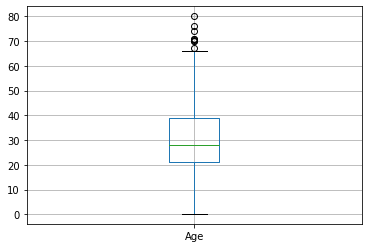

In [15]:
df_concated_ds.boxplot(column=['Age'])

In [16]:
#Amplitude, difference between max and min age.
amplitude = df_concated_ds.Age.max() - df_concated_ds.Age.min()
print(amplitude)

79.83


In [17]:
bold("Variance of age:")
display(df_concated_ds.Age.var())

bold("Standard deviation of age:")
display(df_concated_ds.Age.std())

bold("Coefficient of Variation:")
display(df_concated_ds.Age.std() / df_concated_ds.Age.mean())
print("Como podemos ver o valor do coeficiente de variação é de 48% o que indica uma boa variabilidade dos dados,\n mas não da pra saber se essa variabilidade é maior ou menor do que a da populaçao em geral sem outras vavaliações.\n")

bold("Skew Value:")
aha = df_concated_ds['Age'].dropna()
display(skew(aha))
print("Como podemos ver o valor da assimetria(Skew) é relativamente maior do que zero(pico a esquerda), o que pode indicar que a curva da variavel idade não é normal.")


bold("kurtosis:")
display(kurtosis(aha, fisher=True))
print("As we can see kurtosis is above 0, this menas that the tail of the curve is on the right side. We can interpret this as a sginal that \n this curve is not normal")



#Resources https://www.youtube.com/watch?v=WjdpbO3s-sQ

**Variance of age:**

207.74878655136482

**Standard deviation of age:**

14.413493211271334

**Coefficient of Variation:**

0.48236092520140555

Como podemos ver o valor do coeficiente de variação é de 48% o que indica uma boa variabilidade dos dados,
 mas não da pra saber se essa variabilidade é maior ou menor do que a da populaçao em geral sem outras vavaliações.



**Skew Value:**

0.4070897073591562

Como podemos ver o valor da assimetria(Skew) é relativamente maior do que zero(pico a esquerda), o que pode indicar que a curva da variavel idade não é normal.


**kurtosis:**

0.14051548966408323

As we can see kurtosis is above 0, this menas that the tail of the curve is on the right side. We can interpret this as a sginal that 
 this curve is not normal


In [18]:
#Test for normality

from scipy.stats import kstest, norm
w_critico, p_valor = stats.shapiro(aha)

if p_valor <= 0.05:
  print("Null hypotesis of normality is rejected: " + str(p_valor)) 
else:
  print("Null hypotesis of normality is accepted") 

Null hypotesis of normality is rejected: 5.74782790807582e-11


### Fare

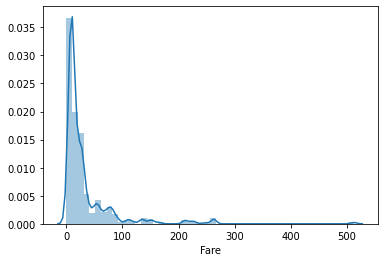

In [19]:
sns.distplot(df_concated_ds.Fare, kde_kws=dict(bw=5));

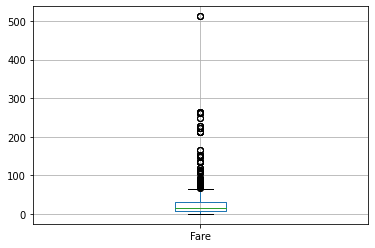

In [20]:
df_concated_ds.boxplot(column=['Fare'])

In [21]:
#Amplitude, difference between max and min age.
amplitude = df_concated_ds.Fare.max() - df_concated_ds.Fare.min()
print(amplitude)

512.3292


In [22]:
bold("Variance of Fare:")
display(df_concated_ds.Fare.var())

bold("Standard deviation of Fare:")
display(df_concated_ds.Fare.std())

bold("Fare Coefficient of Variation:")
display(df_concated_ds.Fare.std() / df_concated_ds.Fare.mean())
print("Como podemos ver o valor do coeficiente de variação é de 48% o que indica uma boa variabilidade dos dados,\n mas não da pra saber se essa variabilidade é maior ou menor do que a da populaçao em geral sem outras vavaliações.\n")

bold("Fare Skew Value:")
aha = df_concated_ds['Fare'].dropna()
display(skew(aha))
print("Como podemos ver o valor da assimetria(Skew) é relativamente maior do que zero(pico a esquerda), o que pode indicar que a curva da variavel idade não é normal.")


bold("kurtosis:")
display(kurtosis(aha, fisher=True))
print("As we can see kurtosis is above 0, this means that we could have many outliers")


**Variance of Fare:**

2678.959737892894

**Standard deviation of Fare:**

51.75866823917414

**Fare Coefficient of Variation:**

1.554525399734158

Como podemos ver o valor do coeficiente de variação é de 48% o que indica uma boa variabilidade dos dados,
 mas não da pra saber se essa variabilidade é maior ou menor do que a da populaçao em geral sem outras vavaliações.



**Fare Skew Value:**

4.362698696939622

Como podemos ver o valor da assimetria(Skew) é relativamente maior do que zero(pico a esquerda), o que pode indicar que a curva da variavel idade não é normal.


**kurtosis:**

26.920195231847895

As we can see kurtosis is above 0, this means that we could have many outliers


In [23]:
#Test for normality of Fare

from scipy.stats import kstest, norm
w_critico, p_valor = stats.shapiro(aha)

if p_valor <= 0.05:
  print("Null hypotesis of normality is rejected: " + str(p_valor)) 
else:
  print("Null hypotesis of normality is accepted") 

Null hypotesis of normality is rejected: 0.0


### **Categorical Variables**


**Survived**

In [37]:
#Absolute frequency
Survived_fr = pd.Series(df_concated['Survived']).value_counts() 
bold("Absolute frequency:")
display(Survived_fr)

#Relative frequency
bold("Realtive frequency:")
display(Survived_fr / len(df_concated['Survived']))

**Absolute frequency:**

0.0    549
1.0    342
Name: Survived, dtype: int64

**Realtive frequency:**

0.0    0.419404
1.0    0.261268
Name: Survived, dtype: float64

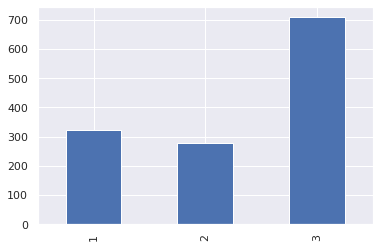

In [28]:
mt = df_concated_ds['Pclass'].value_counts().sort_index()
mt.plot(kind="bar")